Saving Diabetes.csv to Diabetes (2).csv


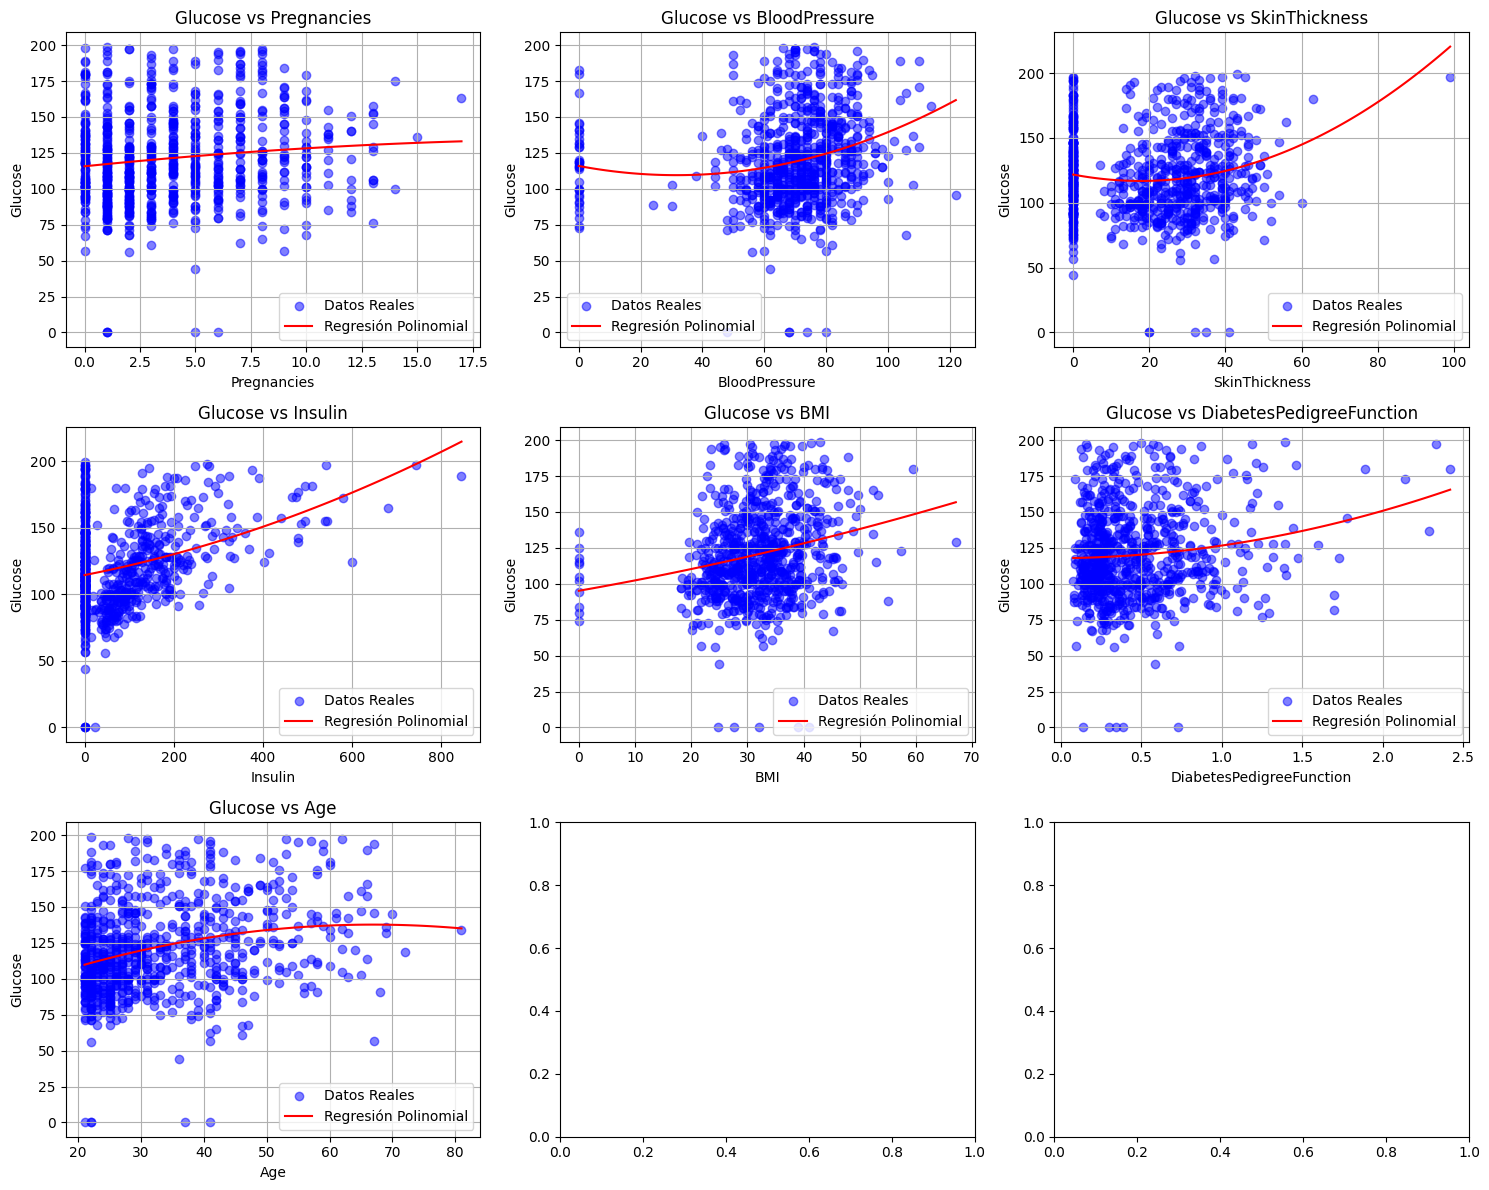

📊 *Comparación entre valores reales y predichos:*
   Glucose Real  Glucose Predicha
0           148        112.028124
1            85         98.591768
2           183        111.995960
3            89        107.784580
4           137        141.321989
5           116        112.923035
6            78        108.015364
7           115        129.213431
8           197        198.433397
9           125        140.567641

📌 *Métricas del Modelo:*
✅ Error Absoluto Medio (MAE): 20.58
✅ Error Cuadrático Medio (RMSE): 27.01
✅ Coeficiente de Determinación (R²): 0.2855

📌 *Ecuaciones Polinomiales:*
Pregnancies: -0.0327x² + 1.5792x + 115.6773
BloodPressure: 0.0064x² + -0.4039x + 115.8896
SkinThickness: 0.0157x² + -0.5567x + 121.7246
Insulin: 0.0001x² + 0.0657x + 114.4294
BMI: 0.0034x² + 0.6878x + 95.1523
DiabetesPedigreeFunction: 7.6906x² + 1.1153x + 117.8126
Age: -0.0133x² + 1.7731x + 78.4300


In [2]:
# 📌 Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Cargar el archivo CSV en Google Colab
from google.colab import files
uploaded = files.upload()

# 📌 Leer el archivo CSV
df = pd.read_csv(next(iter(uploaded)))

# 📌 Definir variables independientes y dependiente
X_columns = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_column = 'Glucose'

# 📌 Crear figuras para los gráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# 📌 Diccionario para almacenar ecuaciones polinomiales
ecuaciones = {}

# 📌 Aplicar regresión polinomial y graficar
for i, col in enumerate(X_columns):
    X = df[[col]].dropna().values  # Eliminamos valores nulos
    y = df[y_column].loc[df[col].notna()].values

    # Transformación polinomial de grado 2
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Ajustar el modelo de regresión
    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # Obtener la ecuación polinomial
    coef = modelo.coef_
    intercepto = modelo.intercept_
    ecuacion = f"{coef[2]:.4f}x² + {coef[1]:.4f}x + {intercepto:.4f}"
    ecuaciones[col] = ecuacion

    # Generar predicciones para la curva
    X_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    y_pred = modelo.predict(poly.transform(X_pred))

    # Graficar datos reales y la curva de regresión
    axes[i].scatter(X, y, color='blue', alpha=0.5, label="Datos Reales")
    axes[i].plot(X_pred, y_pred, color='red', label="Regresión Polinomial")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Glucose")
    axes[i].set_title(f"Glucose vs {col}")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 📌 Ajustar la regresión polinomial usando TODAS las variables
X = df[X_columns].dropna().values
y_real = df[y_column].loc[df[X_columns].notna().all(axis=1)].values

# Transformación polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X_poly, y_real)

# Predecir valores de glucosa
y_pred = modelo.predict(X_poly)

# 📌 Calcular métricas de error
mae = mean_absolute_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
r2 = r2_score(y_real, y_pred)

# 📌 Crear tabla con valores reales vs. predichos
df_predicciones = pd.DataFrame({'Glucose Real': y_real, 'Glucose Predicha': y_pred})
print("📊 *Comparación entre valores reales y predichos:*")
print(df_predicciones.head(10))

# 📌 Mostrar métricas del modelo
print(f"\n📌 *Métricas del Modelo:*")
print(f"✅ Error Absoluto Medio (MAE): {mae:.2f}")
print(f"✅ Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"✅ Coeficiente de Determinación (R²): {r2:.4f}")

# 📌 Mostrar ecuaciones polinomiales
print("\n📌 *Ecuaciones Polinomiales:*")
for var, eq in ecuaciones.items():
    print(f"{var}: {eq}")